# Australian Health Expenditure model training and prediction using Data Science and Machine Learning Techniques(Descriptive Analytics)

# Importing and Cleaning of Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/ganes/Data Science/Datasets/aus_health_exp.csv')

In [3]:
data.head()

,financial_year,state,area_of_expenditure,broad_source_of_funding,detailed_source_of_funding,real_expenditure_millions
0,1997-98,NSW,Administration,Government,Australian Government,315.0
1,1997-98,NSW,Administration,Government,State and local,120.0
2,1997-98,NSW,Administration,Non-government,Private health insurance funds,314.0
3,1997-98,NSW,Aids and appliances,Government,Australian Government,65.0
4,1997-98,NSW,Aids and appliances,Non-government,Individuals,168.0


In [4]:
data.shape

(7100, 6)

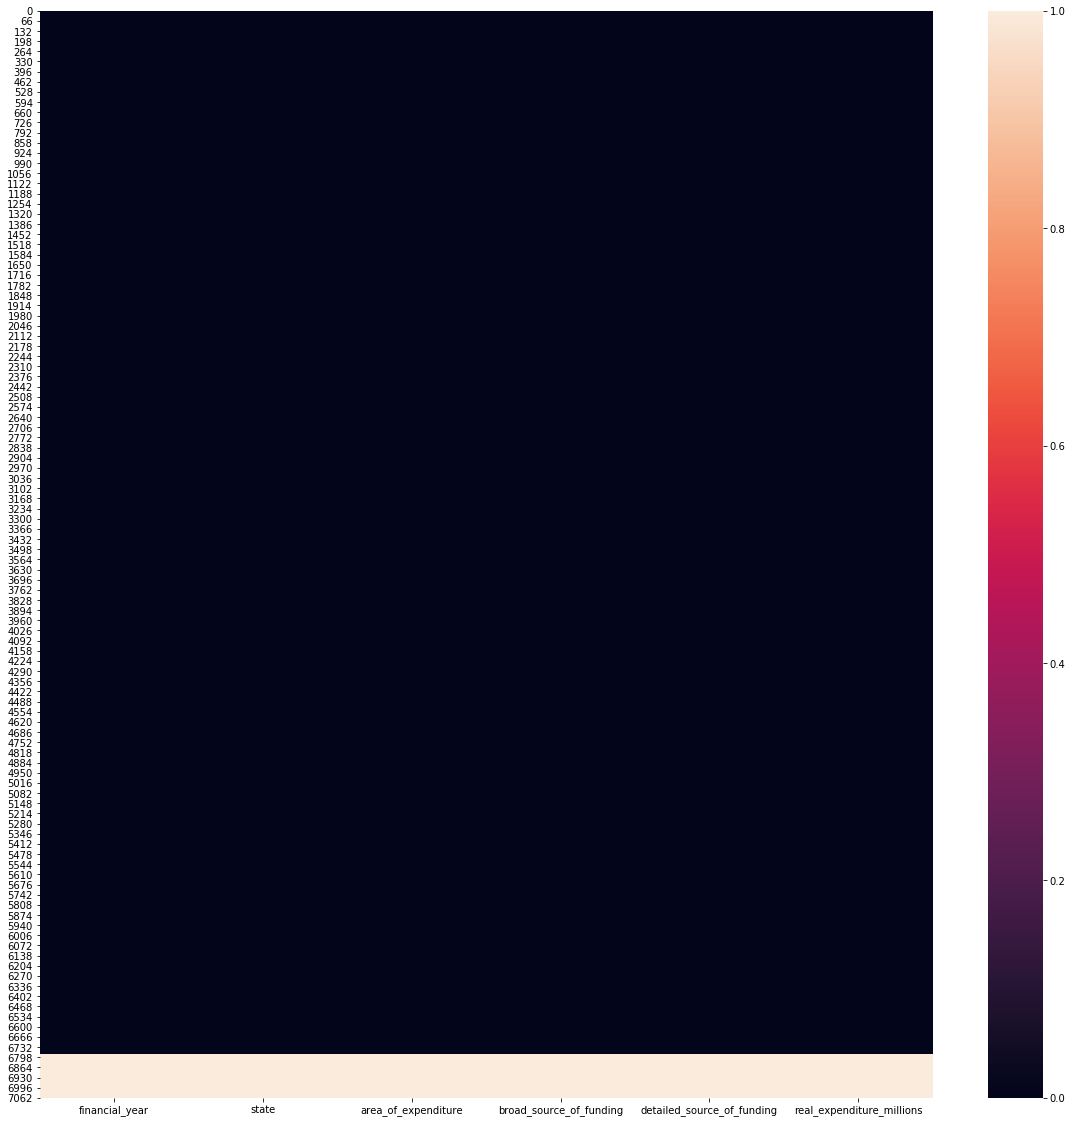

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(data.isnull())

In [6]:
data['financial_year'].isnull().value_counts()

False    6778
True      322
Name: financial_year, dtype: int64

In [7]:
data['broad_source_of_funding'].isnull().value_counts()

False    6778
True      322
Name: broad_source_of_funding, dtype: int64

In [8]:
data.shape[0]-322

6778

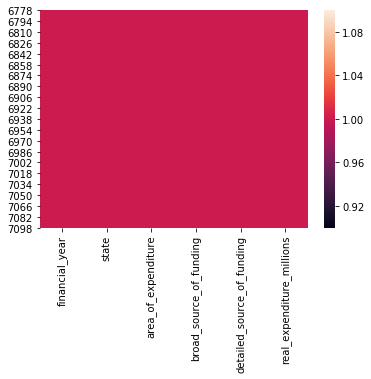

In [9]:
sns.heatmap(data[6778:].isnull())

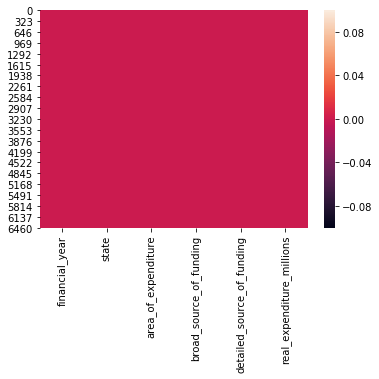

In [10]:
sns.heatmap(data[:6778].isnull())

In [11]:
data = data[:6778]

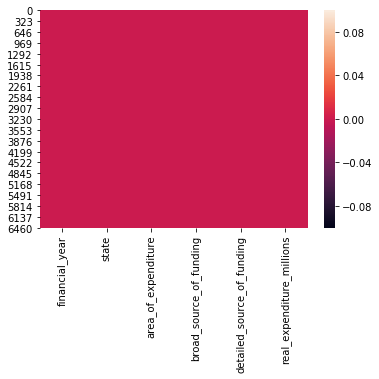

In [12]:
sns.heatmap(data.isnull())

In [13]:
data['financial_year'].value_counts()

2010-11    467
2011-12    467
2003-04    464
2004-05    464
2008-09    459
2009-10    459
2005-06    456
2007-08    456
2006-07    455
2002-03    448
2001-02    445
1999-00    443
2000-01    440
1998-99    437
1997-98    418
Name: financial_year, dtype: int64

In [14]:
data['state'].value_counts()

WA     864
SA     861
NT     851
QLD    851
NSW    843
TAS    838
ACT    837
VIC    833
Name: state, dtype: int64

In [15]:
data['area_of_expenditure'].value_counts()

Public hospitals                600
Patient transport services      599
Dental services                 599
Private hospitals               550
Community health                533
Other health practitioners      483
Aids and appliances             483
All other medications           482
Medical services                480
Public health                   400
Research                        377
Capital expenditure             360
Administration                  352
Benefit-paid pharmaceuticals    240
Medical expense tax rebate      240
Name: area_of_expenditure, dtype: int64

In [16]:
data['broad_source_of_funding'].value_counts()

Non-government    3963
Government        2815
Name: broad_source_of_funding, dtype: int64

In [17]:
data['detailed_source_of_funding'].value_counts()

Australian Government             1800
Other non-government              1424
Individuals                       1347
Private health insurance funds    1192
State and local                   1015
Name: detailed_source_of_funding, dtype: int64

# Powerful Visualization techniques to understand trends and patterns in the given Data

## Distribution of Real Expenditure across the data

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 ]),
 <a list of 6 Text yticklabel objects>)

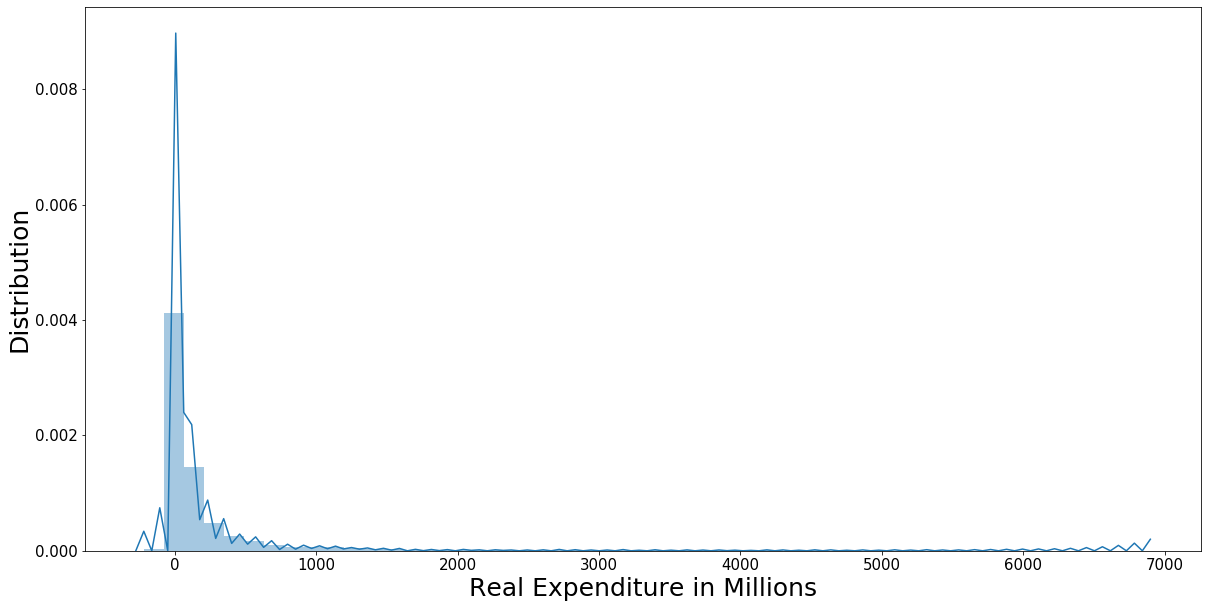

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(data['real_expenditure_millions'])
plt.xlabel('Real Expenditure in Millions', fontsize=25)
plt.ylabel('Distribution', fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## Visualizing the Relationship between Financial Year and Real Expenditure in Millions

Text(0, 0.5, 'Expenditure in Millions')

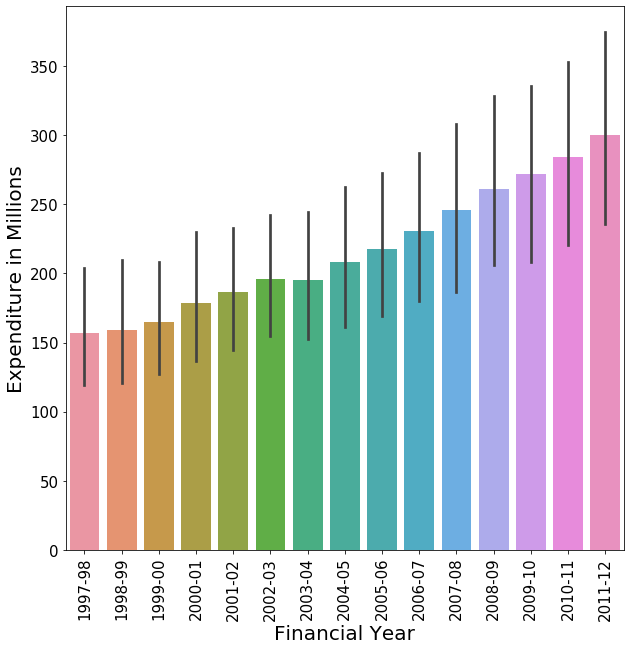

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'financial_year', y = 'real_expenditure_millions', data=data)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.xlabel('Financial Year', fontsize=20)
plt.ylabel('Expenditure in Millions', fontsize=20)

## Visualizing the Relationship between Australian State and Real Expenditure in Millions

Text(0, 0.5, 'Expenditure in Millions')

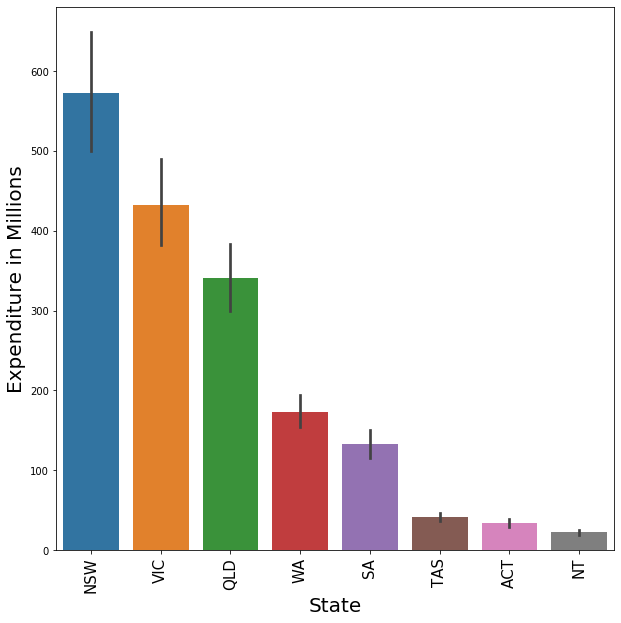

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'state', y = 'real_expenditure_millions', data=data)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 10)
plt.xlabel('State', fontsize=20)
plt.ylabel('Expenditure in Millions', fontsize=20)

## Visualizing the Relationship between Area of Expenditure and Real Expenditure in Millions

Text(0, 0.5, 'Expenditure in Millions')

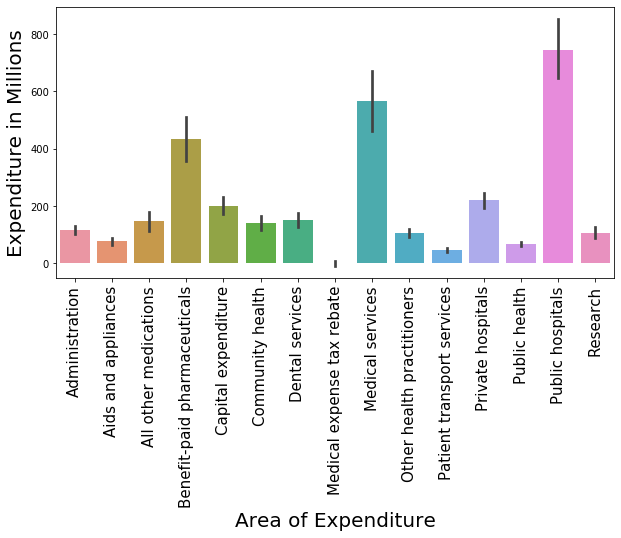

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'area_of_expenditure', y = 'real_expenditure_millions', data=data)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 10)
plt.xlabel('Area of Expenditure', fontsize=20)
plt.ylabel('Expenditure in Millions', fontsize=20)

## Visualizing the Relationship between Source of Funding and Expenditures

Text(0, 0.5, 'Expendites in Millions')

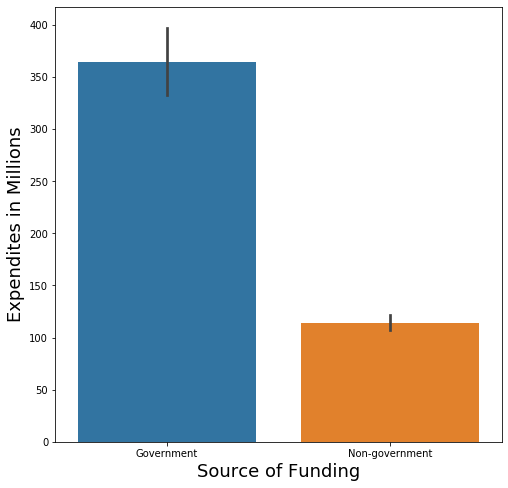

In [22]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'broad_source_of_funding', y = 'real_expenditure_millions', data=data)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Source of Funding', fontsize=18)
plt.ylabel('Expendites in Millions', fontsize=18)

Text(0, 0.5, 'Expendites in Millions')

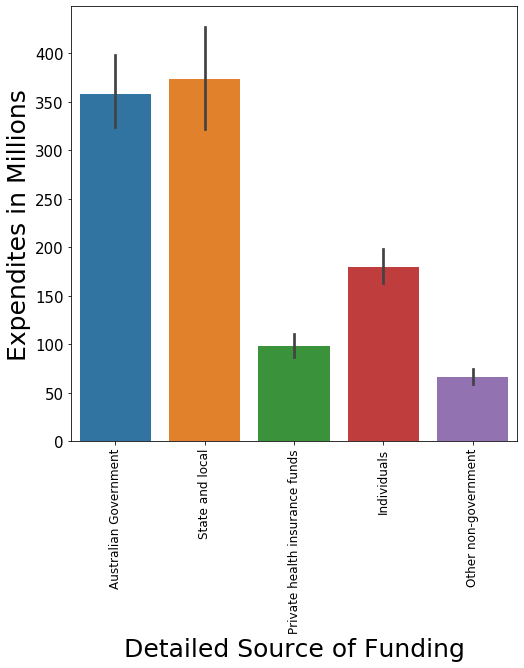

In [23]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'detailed_source_of_funding', y = 'real_expenditure_millions', data=data)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 15)
plt.xlabel('Detailed Source of Funding', fontsize=25)
plt.ylabel('Expendites in Millions', fontsize=25)

## Dummies

In [24]:
def fin_dummy(fin):
    if(fin == '1997-98'):
        return 0
    elif(fin == '1998-99'):
        return 1
    elif(fin == '1999-00'):
        return 2
    elif(fin == '2000-01'):
        return 3
    elif(fin == '2001-02'):
        return 4
    elif(fin == '2002-03'):
        return 5
    elif(fin == '2003-04'):
        return 6
    elif(fin == '2004-05'):
        return 7
    elif(fin == '2005-06'):
        return 8
    elif(fin == '2006-07'):
        return 9
    elif(fin == '2007-08'):
        return 10
    elif(fin == '2008-09'):
        return 11
    elif(fin == '2009-10'):
        return 12
    elif(fin == '2010-11'):
        return 13
    else:
        return 14    


data['financial_year'] = data['financial_year'].apply(fin_dummy)
data.head()

,financial_year,state,area_of_expenditure,broad_source_of_funding,detailed_source_of_funding,real_expenditure_millions
0,0,NSW,Administration,Government,Australian Government,315.0
1,0,NSW,Administration,Government,State and local,120.0
2,0,NSW,Administration,Non-government,Private health insurance funds,314.0
3,0,NSW,Aids and appliances,Government,Australian Government,65.0
4,0,NSW,Aids and appliances,Non-government,Individuals,168.0


In [25]:
def state_dummy(state):
    if state == 'WA':
        return 0
    elif state == 'SA':
        return 1
    elif state == 'QLD':
        return 2
    elif state == 'NT':
        return 3
    elif state == 'NSW':
        return 4
    elif state == 'TAS':
        return 5
    elif state == 'ACT':
        return 6
    else: return 7
    
data['state'] = data['state'].apply(state_dummy)
data.head()

,financial_year,state,area_of_expenditure,broad_source_of_funding,detailed_source_of_funding,real_expenditure_millions
0,0,4,Administration,Government,Australian Government,315.0
1,0,4,Administration,Government,State and local,120.0
2,0,4,Administration,Non-government,Private health insurance funds,314.0
3,0,4,Aids and appliances,Government,Australian Government,65.0
4,0,4,Aids and appliances,Non-government,Individuals,168.0


In [26]:
data['area_of_expenditure'].value_counts()

Public hospitals                600
Patient transport services      599
Dental services                 599
Private hospitals               550
Community health                533
Other health practitioners      483
Aids and appliances             483
All other medications           482
Medical services                480
Public health                   400
Research                        377
Capital expenditure             360
Administration                  352
Benefit-paid pharmaceuticals    240
Medical expense tax rebate      240
Name: area_of_expenditure, dtype: int64

In [27]:
def area_dummy(area):
    if area == 'Public hospitals':
        return 0
    elif area == 'Patient transport services':
        return 1
    elif area == 'Dental services':
        return 2
    elif area == 'Private hospitals':
        return 3
    elif area == 'Community health':
        return 4
    elif area == 'Other health practitioners':
        return 5
    elif area == 'Aids and appliances':
        return 6
    elif area == 'All other medications':
        return 7
    elif area == 'Medical services':
        return 8
    elif area == 'Public health':
        return 9
    elif area == 'Research':
        return 10
    elif area == 'Capital expenditure':
        return 11
    elif area == 'Administration':
        return 12
    elif area == 'Benefit-paid pharmaceuticals':
        return 13
    else:
        return 14
    
data['area_of_expenditure'] = data['area_of_expenditure'].apply(area_dummy)
data['area_of_expenditure'].value_counts()

0     600
2     599
1     599
3     550
4     533
6     483
5     483
7     482
8     480
9     400
10    377
11    360
12    352
14    240
13    240
Name: area_of_expenditure, dtype: int64

In [28]:
def bsf(bsf):
    if bsf == 'Government':
        return 1
    else:
        return 0
    
data['broad_source_of_funding'] = data['broad_source_of_funding'].apply(bsf)

In [29]:
def dsf(dsf):
    if dsf == 'Australian Government':
        return 0
    elif dsf == 'State and local':
        return 1
    elif dsf == 'Private health insurance funds':
        return 2
    elif dsf == 'Individuals':
        return 3
    else:
        return 4
    
data['detailed_source_of_funding'] = data['detailed_source_of_funding'].apply(dsf)
data.head()

,financial_year,state,area_of_expenditure,broad_source_of_funding,detailed_source_of_funding,real_expenditure_millions
0,0,4,12,1,0,315.0
1,0,4,12,1,1,120.0
2,0,4,12,0,2,314.0
3,0,4,6,1,0,65.0
4,0,4,6,0,3,168.0


In [30]:
print(data['detailed_source_of_funding'].value_counts())
print(data['detailed_source_of_funding'].value_counts().sum())

0    1800
4    1424
3    1347
2    1192
1    1015
Name: detailed_source_of_funding, dtype: int64
6778


## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = data.drop(['real_expenditure_millions'],axis = 1)
y = data['real_expenditure_millions']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [94]:
X_train.shape,y_train.shape

((5083, 5), (5083,))

In [95]:
X_test.shape,y_test.shape

((1695, 5), (1695,))

# Machine Learning Algorithms

## Linear Regression and Prediction

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
prediction1 = lr.predict(X_test)

# Evaluation of the Linear Regression Model

## Mean Squared Error

In [100]:
from sklearn.metrics import mean_squared_error

In [101]:
print(mean_squared_error(y_test,prediction1))

291399.4882535814


## Mean Absolute Error

In [102]:
from sklearn.metrics import mean_absolute_error

In [103]:
print(mean_absolute_error(y_test,prediction1))

273.10019898440925


## RMSE

In [104]:
np.sqrt(mean_squared_error(y_test,prediction1))

539.8143090485667

## Decision Tree Regressor

In [105]:
from sklearn.tree import DecisionTreeRegressor

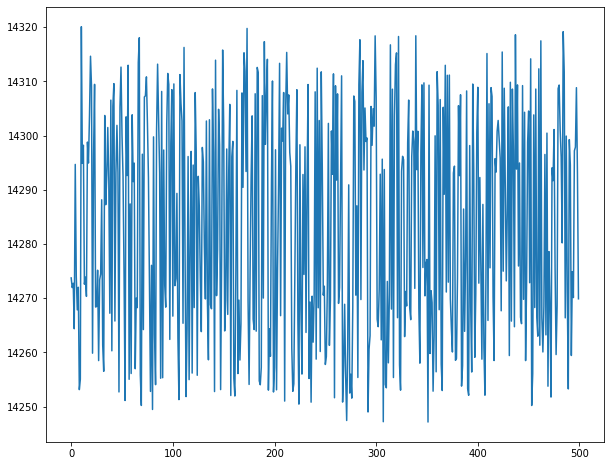

In [106]:
dt_err = []
for i in range(0,500):
    dt_i = DecisionTreeRegressor(random_state=i)
    dt_i.fit(X_train,y_train)
    pred_dt_i = dt_i.predict(X_test)
    dt_err.append(mean_squared_error(y_test,pred_dt_i))

plt.figure(figsize=(10,8))
plt.plot(dt_err)

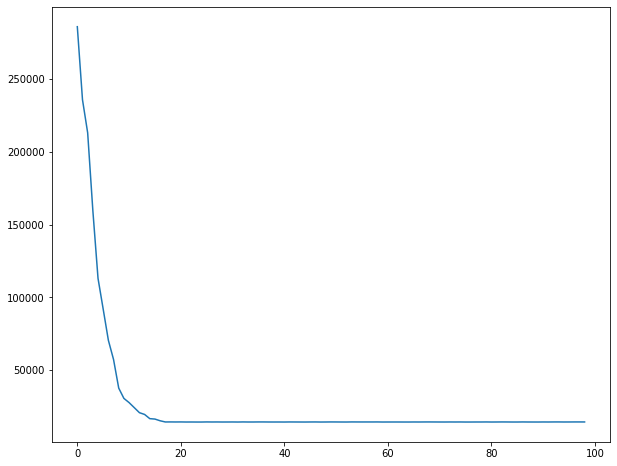

In [107]:
dt_err_1 = []
for i in range(1,100):
    dt_i_1 = DecisionTreeRegressor(max_depth=i)
    dt_i_1.fit(X_train,y_train)
    pred_dt_i_1 = dt_i_1.predict(X_test)
    dt_err_1.append(mean_squared_error(y_test,pred_dt_i_1))

plt.figure(figsize=(10,8))
plt.plot(dt_err_1)

In [205]:
dt_err_1.index(min(dt_err_1))

44

In [109]:
dt_err.index(min(dt_err))

351

In [206]:
dt = DecisionTreeRegressor(random_state=351,max_depth=45)

In [207]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=45, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=351, splitter='best')

In [208]:
prediction2 = dt.predict(X_test)

## Evaluation of Decision Tree Regressor

In [209]:
print(mean_squared_error(y_test,prediction2))

14247.142182890855


In [210]:
print(mean_absolute_error(y_test,prediction2))

35.047787610619466


In [211]:
np.sqrt(mean_squared_error(y_test,prediction2))

119.36139318427401

## Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rfr = RandomForestRegressor(n_estimators=33,random_state=32)

In [138]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=33,
                      n_jobs=None, oob_score=False, random_state=32, verbose=0,
                      warm_start=False)

In [139]:
prediction3 = rfr.predict(X_test)

## Evaluation of Random Forest regressor

In [140]:
print(mean_squared_error(y_test,prediction3))

10410.780665870288


In [141]:
print(mean_absolute_error(y_test,prediction3))

36.170876910699924


In [142]:
np.sqrt(mean_squared_error(y_test,prediction3))

102.03323314425691

# XGBoost Regressor

In [143]:
from xgboost import XGBRegressor

In [266]:
xgbr = XGBRegressor(n_estimators=10000,random_state=351,learning_rate=1)

In [267]:
xgbr.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:49:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=351,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [268]:
prediction4 = xgbr.predict(X_test)

## Evaluation of XGBoost Regressor

In [269]:
print(mean_squared_error(y_test,prediction4))

16388.05435592904


In [270]:
print(mean_absolute_error(y_test,prediction4))

76.54588575602281


In [271]:
np.sqrt(mean_squared_error(y_test,prediction4))

128.01583634819968

# AdaBoost Regressor

In [150]:
from sklearn.ensemble import AdaBoostRegressor

In [151]:
adabr = AdaBoostRegressor(n_estimators=150, random_state = 100, learning_rate=1)

In [152]:
adabr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
                  n_estimators=150, random_state=100)

In [153]:
prediction5 = adabr.predict(X_test)

## Evaluation of Adaboost Regressor

In [154]:
print(mean_squared_error(y_test,prediction5))

158218.03603379676


In [155]:
print(mean_absolute_error(y_test,prediction5))

302.9344261309991


In [156]:
np.sqrt(mean_squared_error(y_test,prediction5))

397.76630831908926

## K-Nearest Neighbour Regression

In [157]:
from sklearn.neighbors import KNeighborsRegressor

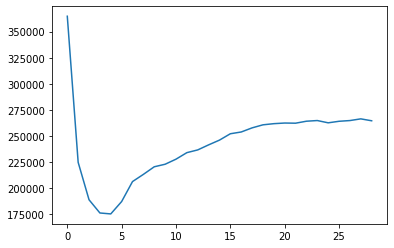

In [158]:
error_rate = []
for i in range(1,30):
    knn_i = KNeighborsRegressor(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    pred_i = knn_i.predict(X_test)
    error_rate.append(mean_squared_error(y_test,pred_i))
    
plt.plot(error_rate)

In [175]:
knnr = KNeighborsRegressor(n_neighbors=4)

In [176]:
knnr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [177]:
prediction6 = knnr.predict(X_test)

## Evaluation of KNN Regressor

In [178]:
print(mean_squared_error(y_test,prediction6))

176081.29483775812


In [179]:
print(mean_absolute_error(y_test,prediction6))

186.6551622418879


In [180]:
np.sqrt(mean_squared_error(y_test,prediction6))

419.62041756539696

# End